Use any additional libraries you want, but if you don't explicitly code stuff that I have explicitly asked you to code, you will not get marks.

### Q1. Kernel k-means

Let's try and end our course on a happy note. The smiley dataset you see below is made up of many clusters of points. 

In [1]:
import numpy as np
import numpy.linalg as lin
import numpy.random as rnd
from matplotlib import pyplot as plt


def getFigure( sizex = 7, sizey = 7 ):
    fig = plt.figure( figsize = (sizex, sizey) )
    return fig

def plot2D( X, fig, color = 'r', marker = '+', size = 100, empty = False ):
    plt.figure( fig.number )
    if empty:
        plt.scatter( X[:,0], X[:,1], s = size, facecolors = 'none', edgecolors = color, marker = marker  )
    else:
        plt.scatter( X[:,0], X[:,1], s = size, c = color, marker = marker )


def genCrescentData( d, n, mu, r, flipped = False ):
    X = np.vstack( (np.cos( np.linspace( 0, np.pi, n ) ), np.sin( np.linspace( 0, np.pi, n ) ) ) ).T
    if flipped:
        X[:,1] = -np.abs( X[:,1] )
    else:
        X[:,1] = np.abs( X[:,1] )
    X = (X * r) + mu
    return X

def genSphericalData( d, n, mu, r ):
    X = rnd.normal( 0, 1, (n, d) )
    norms = lin.norm( X, axis = 1 )
    X = X / norms[:, np.newaxis]
    X = (X * r) + mu
    return X

In [2]:
d = 2
n = 200

mu1 = np.array( [0,0] )
mu2 = np.array( [0,1] )
mu3 = np.array( [0,0] )
mu4 = np.array( [-3,5] )
mu5 = np.array( [3,5] )

tmp1 = genCrescentData( d, n, mu1, 1 )
tmp2 = genCrescentData( d, n, mu2, 5, flipped = True )
tmp3 = genSphericalData( d, n, mu3, 10 )
tmp4 = genSphericalData( d, n, mu4, 1 )
tmp5 = genSphericalData( d, n, mu5, 1 )
X = np.vstack( (tmp1, tmp2, tmp3, tmp4, tmp5) )

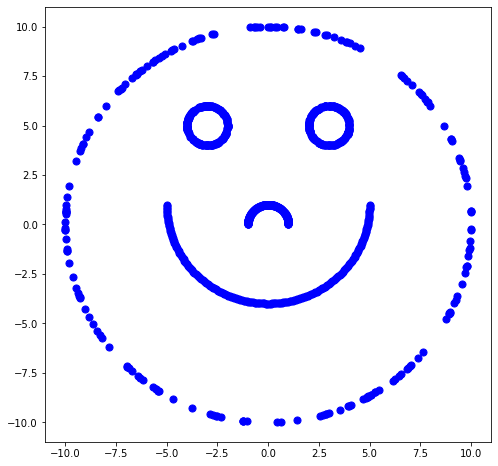

In [3]:
fig = getFigure( 8, 8 )
plot2D( X, fig, size = 50, color = 'b', marker = 'o' )

(a) Can you implement the k-means algorithm to cluster this dataset? Visualize your output. [10 points] 

(b) Implement k-means++ to initialize cluster centers usefully. [5 points]

(c) What value of k gives you the best clustering? Are you happy with the quality of the clustering? [5 points]


(d) I'm going to say that we want to be able to do better than this. So I want you to kernelize your k-means algorithm with a Gaussian kernel. Visualize the clustering output of your kernel k-means algorithm [15 points]

### Q2. Expectation-Maximization

We saw how to use EM to learn parameters for Gaussian mixture models last week. Specifically, for a GMM described by the set of parameters $\{\pi_k, \mu_k, \Sigma_k \}_{k=1}^K$, we saw that the E-step boils down to figuring out the expected assignment of clusters based on a responsibility judgment proportional to $\pi_k~N(\mu_k, \Sigma_k)$, given curent parameter estimates, followed by using GDA MLE updates assuming the current expected assignment in the M-step to update parameter values.

(a) Can you derive the E-step and M-step for an EM algorithm that would work for a Gaussian mixture model wherein the mixture weights $\pi_k$ are known, and the covariances are restricted to be spherical, i.e. $\Sigma_k = \sigma^2_k I$? [20 points]

(b) Implement this algorithm and show that it works on synthetic data with 3 clusters. If you are unable to derive the EM algorithm for part (a), implement the EM algorithm I showed in the class slides for the standard GMM (5 point penalty for taking this option) [15 points]. 

# Question 1 

## Question 1(a)

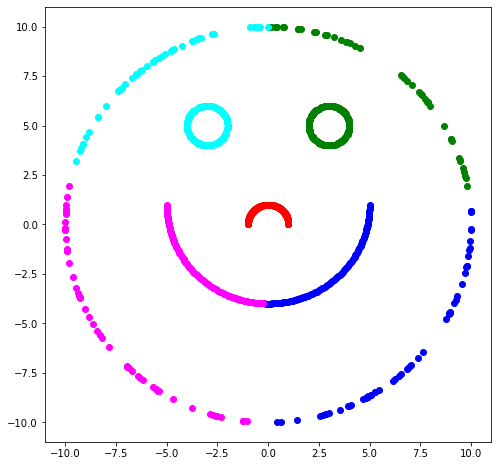

In [4]:
# Q1 (a)
#Taking initial k value as 5
k=5
#center=np.random.uniform(-10,10,[k,2])
#this function will calculate mean centers for the data 
def assigncenters(X,k):
    center=np.array([]).reshape(X.shape[1],0) 
    for i in range(k):
        r1=np.random.randint(0,len(X)-1)
        center=np.c_[center,X[r1]]
    return center
#find the distance for all points from these centers
def distance(d1,d2,k):
    center1=d1
    points=d2
    
    dist=np.array([]).reshape(len(X),0)
    for i in range(k):
        temp=np.sum((points-center1[:,i])**2,axis=1)
        dist=np.c_[dist,temp]
    x=np.argmin(dist,axis=1)+1
    return x

#this is the k means algo which is calling the above distance fucntion as to calculate the distance from the means 
# and then uodating them.
def kmeans(X,k,center_fun):
    output={}
    center=center_fun(X,k)
    temp1=center.copy()
    while(True):
        
        dist= distance(center,X,k)
        out={}
        for i in range(k):
            out[i+1]=np.array([]).reshape(X.shape[1],0)
        for i in range(len(X)):
            out[dist[i]]=np.c_[out[dist[i]],X[i]]
        for i in range(k):
            out[i+1]=out[i+1].T
        for i in range(k):
            center[:,i]=np.mean(out[i+1],axis=0)
        if((temp1==center).all()):
            break
        else:
            temp1=center.copy()
        output=out
    return output,center
#this output is the dict containing the culuters and data points and below plotting it 
output,center= kmeans(X,k,assigncenters)  
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
plt.figure(figsize = (8,8))
for i in range(k):
    plt.scatter(output[i+1][:,0],output[i+1][:,1],c=color[i],label=labels[i])
plt.show()






## Question 1(b)

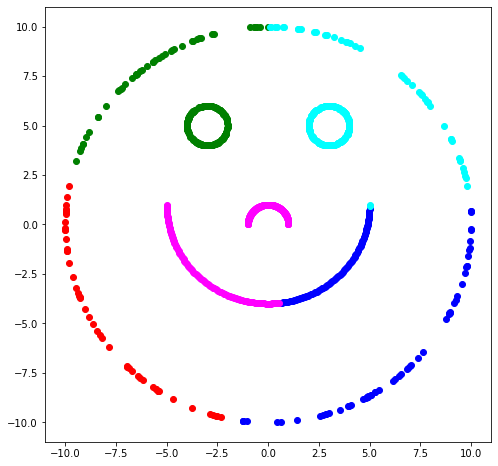

In [5]:
# Q1(b)
# k-means ++
#assigning centers
def eucli_dist(x,y):
    return np.sum((x-y)**2,axis=1)
# defining a new functon for assignning centers for the data points using k means++    
def assigncentersnew(X,k):
    center=np.array([]).reshape(X.shape[1],0) 
    y=np.random.randint(0,len(X)-1)
    center=np.c_[center,X[y]]
    for i in range(1,k):
        temp = np.array([]).reshape(X.shape[0],0)
        for j in range(center.shape[1]):
            #print(j)
            temp = np.c_[temp,eucli_dist(X,center[:,j])]
        prob = np.min(temp,axis=1)
        ind = np.random.choice(a = X.shape[0],p = prob/np.sum(prob))
        center = np.c_[center,X[ind]]
    return center
output,center= kmeans(X,k,assigncentersnew) 
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
plt.figure(figsize = (8,8))
for i in range(k):
    plt.scatter(output[i+1][:,0],output[i+1][:,1],c=color[i],label=labels[i])
plt.show()
    
    


## Question 1 (c)

In [6]:
## Q1 (c)
# optimal k value using the elbow method
# the array will store the wcss
arr=[]
for i in range(1,11):
    output,center = kmeans(X,i,assigncentersnew)
    tempwcss=0
    for j in range(center.shape[1]):
        tempwcss += np.sum(eucli_dist(output[j+1],center[:,j]))
    arr.append(tempwcss)

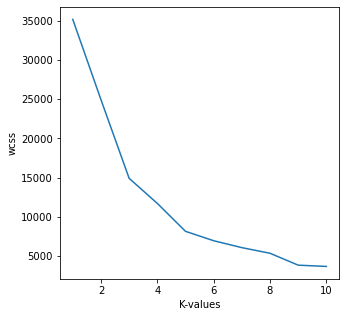

In [7]:
plt.figure(figsize = (5,5))
plt.plot(np.arange(1,11),arr)
plt.xlabel("K-values")
plt.ylabel("wcss")
plt.show()

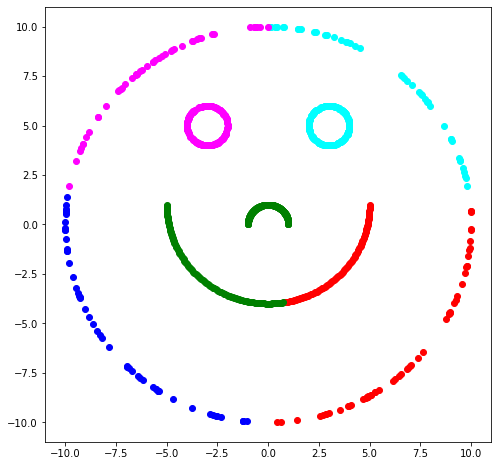

In [8]:
#plotting using the optimal k
output,center= kmeans(X,5,assigncentersnew) 
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
plt.figure(figsize = (8,8))
for i in range(k):
    plt.scatter(output[i+1][:,0],output[i+1][:,1],c=color[i],label=labels[i])
#plt.show()
#the clustring the not as we expected but it works better if we initalise the centers effectively as compared to when we
# didnt as in the previous simple k means approach moreover the output improves if we uses kernel trick.

## Question 1(d)

<Figure size 576x576 with 0 Axes>

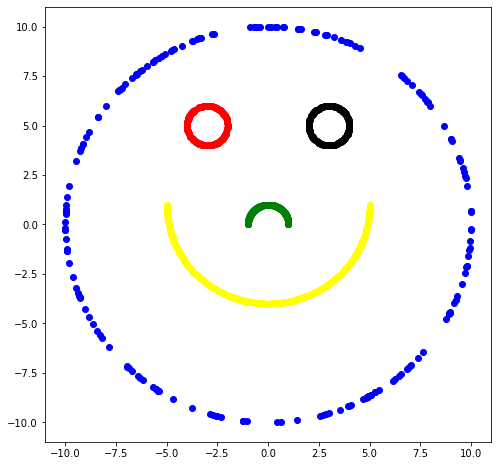

In [9]:
#using rbf kernel fucntion to kernelize the k-means algorithm with a Gaussian kernel

def RBF_kernel_distance(X,Y):
    tem = eucli_dist(X,Y)
    base = 2*(0.05**2)
    return np.exp(-tem/base)
def distance1(x,y):
    s=0
    l= len(x)
    for i in range(l):
        s+= ((x[i]-y[i])**2)
    return s
def kernel(x,sigma):
    arr=[[0]*len(x) for i in range(len(x))]
    for i in range(len(x)):
        for j in range(i,len(x)):
            if(i!=j):
                dis=np.exp(-(distance1(x[i],x[j])/(2.0*(sigma**2))))
                arr[i][j]=dis
                arr[j][i]=arr[i][j]
    return arr
x_=kernel(X,X.std()*0.9)
x_=np.array(x_)
#print(x_)
output,center= kmeans(x_,5,assigncenters) 
fig = getFigure( 8, 8 )

labels= distance(center,x_,5)
plt.figure(figsize = (8,8))
plt.scatter(X[labels == 1,0],X[labels == 1,1],color = 'red')
plt.scatter(X[labels == 2,0],X[labels == 2,1],color = 'yellow')
plt.scatter(X[labels == 3,0],X[labels == 3,1],color = 'blue')
plt.scatter(X[labels == 4,0],X[labels == 4,1],color = 'green')
plt.scatter(X[labels == 5,0],X[labels == 5,1],color = 'black')

                
    

# Question 2

## Q2 (a)

Derivation of E-step and M-step for EM algorithm on Gaussian Mixture Model 

Gausssain mixture distribution:



$$p(\textit{z}_n = k|\textit{x}_n, \hat{\Theta})\;\;\alpha\;\;p(\textit{z}_n = k|\hat{\Theta}) * p(\textit{x}_n|\textit{z}_n = k, \hat{\Theta})$$

$$= \pi_k * N(\textit{x}_n|\hat{\mu_k}, \hat{\sigma_k^2}I_D)$$


Also,



$$\hat{\Theta} = argmax_{\Theta} E_{p(Z|X, \hat{\Theta})} [log(p(X,Z|\Theta))]$$
Here z be any latent variable
$$= argmax_{\Theta} E_{p(Z|X, \hat{\Theta})} \Bigg[\sum_{n=1}^N log(p(\textit{x}_n,\textit{z}_n|\Theta))\Bigg]$$

we have,  $p(\textit{x}n,\textit{z}_n|\Theta) = \sum{k=1}^K(p(\textit{z}n = k|\hat{\Theta}) * p(\textit{x}_n|\textit{z}_n = k, \hat{\Theta}))^{\textit{z}{nk}}$

where $\textit{z}{nk} = 1$ when $\textit{x}_n$ belongs to $k^{th}$ cluster, else $\textit{z}{nk} = 0$

So,

$$\hat{\Theta} = argmaxr_{\Theta} E\Bigg[\sum_{n=1}^N  \sum_{k=1}^K  \textit{z}_{nk} [log\,\pi_k + log\,N(\textit{x}_n|\mu_k, \sigma_k^2 I_D)]\Bigg]$$

using the expectation of $\textit{z}_{nk}$

$$=argmax_{\Theta}\sum_{n=1}^N  \sum_{k=1}^K E_{p(\textit{z}n|\textit{x}_n, \hat{\Theta})}\;[\textit{z}{nk}]\;[log\,\pi_k + log\,N(\textit{x}_n|\mu_k, \sigma_k^2 I_D)]$$


Expectation Step

$$E[\textit{z}{nk}] = \gamma{nk}$$

$$= 0 * p(\textit{z}{nk} = 0 | \textit{x}_n, \hat{\Theta}) + 1 * p(\textit{z}{nk} = 1 | \textit{x}_n, \hat{\Theta})$$

$$= \frac{\pi_k * N(\textit{x}n|\hat{\mu}_k, \hat{\sigma}_k^2 I_D)}{\sum{i=1}^K \pi_i * N(\textit{x}_n|\hat{\mu}_i, \hat{\sigma}_i^2 I_D)}$$

$$N_k = \sum_{n=1}^N \gamma_{nk}$$

Maximization Step

$$\hat{\Theta} = argmax_{\Theta} \sum_{n=1}^N  \sum_{k=1}^K E_{p(\textit{z}n|\textit{x}_n, \hat{\Theta})}\;[\textit{z}{nk}]\;[log\,\pi_k + log\,N(\textit{x}_n|\mu_k, \sigma_k^2 I_D)]$$

$$= argmax_{\Theta} \sum_{n=1}^N  \sum_{k=1}^K \gamma_{nk}\;[log\,\pi_k + log\,N(\textit{x}_n|\mu_k, \sigma_k^2 I_D)]$$

$$=argmax_{\Theta}\sum_{n=1}^N  \sum_{k=1}^K \gamma_{nk}\;[log\,\pi_k + log\frac{1}{\sqrt{(2\pi)^D|\sigma_k^2I_D|}}exp\Bigg(-\frac{1}{2}(\textit{x}_n - \mu_k)^T\frac{I_D}{\sigma_k^2}(\textit{x}_n - \mu_k)\Bigg)$$

$$=argmax_{\Theta}\sum_{n=1}^N  \sum_{k=1}^K \gamma_{nk}\;[log\,\pi_k + log\frac{1}{(2\pi)^{\frac{D}{2}}(\sigma_k^2)^\frac{D}{2}}exp\Bigg(-\frac{1}{2}(\textit{x}_n - \mu_k)^T\frac{I_D}{\sigma_k^2}(\textit{x}_n - \mu_k)\Bigg)$$

$$=argmax_{\Theta}\sum_{n=1}^N  \sum_{k=1}^K \gamma_{nk}\;\Bigg[log\,\pi_k + -\frac{D}{2}log(2\pi) - \frac{D}{2}log(\sigma_k^2) - \Big(\frac{1}{2\sigma_k^2}(\textit{x}_n - \mu_k)^TI_D(\textit{x}_n - \mu_k)\Big)\Bigg]$$



$\\$To find the MLE estimates of $\mu_k$ and $\sigma_k^2$ we will take the partial derivative of the above expression with respect to $\mu_k$ and $\sigma_k^2$.

Finding $\mu_{k}$<br>
$$
\frac{\partial \hat{\Theta}}{\partial \mu_{k}}=0
$$

$$
\begin{align*}
&\text{All the terms not belonging to the cluster of the paramter under consideration will go to 0}\\
&\sum_{n=1}^{N} \gamma_{n k}\left[-\frac{\partial}{\partial \mu_{k}}\left(\frac{1}{2\sigma_{k}^{2}}\left(x_{n}-\mu_{k}\right)^{T} I_{D}\left(x_{n}-\mu_{k}\right)\right)\right]=0 \\
& \sum_{n=1}^{N} \gamma_{n k}\left[-\left(\frac{\left(x_{n}-\mu_{k}\right)}{\sigma_{k}^{2}}\right)\right]=0 \\
& \sum_{n=1}^{N}-\gamma_{n k}\left(x_{n}-\mu_{k}\right)=0 \\
& \sum_{n=1}^{N}-\gamma_{n k} x_{n}+\sum_{n=1}^{N} \gamma_{n k} \mu_{k}=0 \\
& \mu_{k} \sum_{n=1}^{N} \gamma_{n k}=\sum_{n=1}^{N} \gamma_{n k} x_{n} \\
& \mu_{k}=\frac{\sum_{n=1}^{N} \gamma_{n k} x_{n}}{\sum_{n=1}^{N} \gamma_{n k}} \\
& \mu_{k}=\frac{\sum_{n=1}^{N} \gamma_{n k} x_{n}}{N_{k}}
\end{align*}
$$

Finding $\sigma_{k}^{2}$<br>
$$
\frac{\partial \hat{\Theta}}{\partial \sigma_{k}^{2}}=0
$$

$$
\begin{align*}
&\text{All the terms not belonging to the cluster whose parameter is under consideration will go to 0}\\
& \sum_{n=1}^{N} \gamma_{n k} \frac{\partial}{\partial \sigma_{k}^{2}}\left[-\frac{D}{2} \log\left(\sigma_{k}^{2}\right)-\left(\frac{1}{2 \sigma_{k}^{2}}\left(x_{n}-\mu_{k}\right)^{T} I_{D}\left(x_{n}-\mu_{k}\right)\right)\right]=0 \\
&\sum_{n=1}^{N} \gamma_{n k}\left[-\frac{D}{2 \sigma_{k}^{2}}-\left(-\frac{1}{2\left(\sigma_{k}^{2}\right)^{2}}\left(x_{n}-\mu_{k}\right)^{T} I_{D}\left(x_{n}-\mu_{k}\right)\right)\right]=0 \\
& \sum_{n=1}^{N} \gamma_{n k}\left[D \sigma_{k}^{2}-\left(x_{n}-\mu_{k}\right)^{T} I_{D}\left(x_{n}-\mu_{k}\right)\right]=0 \\
&\sum_{n=1}^{N} \gamma_{n k} D \sigma_{k}^{2}=\sum_{n=1}^{N} \gamma_{n k}\left(x_{n}-\mu_{k}\right)^{T}\left(x_{n}-\mu_{k}\right) \\
& D \sigma_{k}^{2} \sum_{n=1}^{N} \gamma_{n k}=\sum_{n=1}^{N} \gamma_{n k}\left(x_{n}-\mu_{k}\right)^{T}\left(x_{n}-\mu_{k}\right) \\
&\sigma_{k}^{2}=\frac{\sum_{n=1}^{N} \gamma_{n k}\left(x_{n}-\mu_{k}\right)^{T}\left(x_{n}-\mu_{k}\right)}{N_{k} D}
\end{align*}
$$


The EM Algorithm will be :<br>
Initialization-
$$
\text{Set $\Theta$ =$\left\{\mu_{k}, \sigma_{k}^{2}\right\}_{k=1}^{K}$ as $\Theta^{0}$ and $t=0$}
$$<br><br>

2. E-Step - compute responsibilities
$$
\begin{align*}
E\left[z_{n k}\right]=\gamma_{n k} &= \frac{\pi_{k} * N\left(x_{n} \mid \mu_{k}^{t-1},\left(\sigma_{k}^{2}\right)^{t-1} I_{D}\right)}{\sum_{i=1}^{K} \pi_{i} * N\left(x_{n} \mid \mu_{k}^{t-1},\left(\sigma_{k}^{2}\right)^{t-1} I_{D}\right)} \\
N_{k} &= \sum_{n=1}^{N} \gamma_{n k}
\end{align*}
$$<br><br>

3. M-Step- Compute the total responsibility assigned to each cluster, which will be useful when 
   implementing M-steps
$$
\begin{align*}
\mu_{k}^{t} &= \frac{\sum_{n=1}^{N} \gamma_{n k}^{t} x_{n}}{N_{k}^{t}} \\
\left(\sigma_{k}^{2}\right)^{t} &= \frac{\sum_{n=1}^{N} \gamma_{n k}^{t}\left(x_{n}-\mu_{k}^{t}\right)^{T}\left(x_{n}-\mu_{k}^{t}\right)}{N_{k}^{t} D}
\end{align*}
$$